In [3]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

###  Load Data 

In [4]:
# Import data
nbe_df = pd.read_excel('FL2019 Data.xls', sheet_name='NBE (Coating) 2019')
nbi_df = pd.read_excel('FL2019 Data.xls', sheet_name='NBI 2019')  
env_df = pd.read_excel('FL2019 Data.xls', sheet_name='Environmental Data 2019')
print(nbe_df.head())
print(" ***********************")
print(nbi_df.head())
print(" ***********************")
print(env_df.head())

   STATE STRUCNUM   EN  TOTALQTY  CS1  CS2  CS3  CS4    EPN
0     12   010001  241       366    0  323   43    0    NaN
1     12   010026  241       374  327   34   13    0    NaN
2     12   010028  241       294  220   65    9    0    NaN
3     12   010028  330        23   23    0    0    0    NaN
4     12   010028  515        12   12    0    0    0  330.0
 ***********************
   STATE_CODE_001  STRUCTURE_NUMBER_008  DETOUR_KILOS_019  MAINTENANCE_021  \
0              12                 10001                 0                1   
1              12                 10003                20                2   
2              12                 10006                 3                2   
3              12                 10007                 4                2   
4              12                 10008                16                2   

   Bridge_Age  TRAFFIC_LANES_ON_028A  TRAFFIC_LANES_UND_028B  ADT_029  \
0          47                      6                       0    31500   


### Filter data by selecting a certain element number

In [5]:
nbe_element_df = nbe_df[nbe_df['EN'] == 107] 
print(nbe_element_df)

       STATE STRUCNUM   EN  TOTALQTY   CS1   CS2  CS3  CS4  EPN
77        12   010065  107      1305     0  1305    0    0  NaN
105       12   010069  107      2798  2798     0    0    0  NaN
120       12   010070  107      2448  2448     0    0    0  NaN
150       12   010073  107      1663  1267   396    0    0  NaN
162       12   010074  107      1663  1661     2    0    0  NaN
218       12   010082  107      1722  1722     0    0    0  NaN
231       12   010083  107      1722  1722     0    0    0  NaN
1711      12   030311  107      2530  2530     0    0    0  NaN
1721      12   030312  107       912   912     0    0    0  NaN
1731      12   030313  107      2128  2128     0    0    0  NaN
1748      12   030321  107      1424  1424     0    0    0  NaN
1757      12   030322  107      1424  1244   180    0    0  NaN
2157      12   070033  107       780   693    79    8    0  NaN
2339      12   080001  107      1054  1050     4    0    0  NaN
2455      12   080046  107       681   6

In [6]:
nbe_element_df = nbe_element_df.reset_index(drop=True) 


nbi_df_filter = nbi_df[nbi_df['STRUCTURE_NUMBER_008'].isin(nbe_element_df['STRUCNUM'])]
nbi_df_filter = nbi_df_filter.reindex(index=nbi_df_filter.index[::1]) 
nbi_df_filter = nbi_df_filter.reset_index(drop=True) 

env_df_filter = env_df[env_df['STRUCTURE_'].isin(nbe_element_df['STRUCNUM'])]
env_df_filter = env_df_filter.reindex(index=env_df_filter.index[::1]) 
env_df_filter = env_df_filter.reset_index(drop=True) 

# print(nbe_element_df.head())
# print(nbi_df_filter.head())

# print(nbe_element_df.__len__())
# print(nbi_df_filter.__len__())
print(env_df_filter)

     STATE_CODE  STRUCTURE_  Decimal_La  Decimal_Lo  temp_dp_2m  avg_rh_2m  \
0            12       10065   26.917481  -82.012369   19.507700  81.898201   
1            12       10069   26.890944  -81.998083   19.505800  81.872101   
2            12       10070   26.891147  -81.997856   19.505800  81.872101   
3            12       10073   26.895047  -82.002519   19.505800  81.872101   
4            12       10074   26.895086  -82.002067   19.505800  81.872101   
5            12       10082   26.858139  -81.971333   19.507799  81.854797   
6            12       10083   26.858111  -81.971000   19.507799  81.854797   
7            12       30311   26.171047  -81.731661   19.905600  82.402603   
8            12       30312   26.172814  -81.732758   19.905600  82.402603   
9            12       30313   26.175756  -81.734106   19.905600  82.402603   
10           12       30321   26.272861  -81.742850   19.833599  82.410103   
11           12       30322   26.272889  -81.742556   19.833599 

In [7]:
# Concatenate
# DESIGN_LOAD_031   OPEN_CLOSED_POSTED_041   BRIDGE_CONDITION   SCOUR_CRITICAL_113

#                         nbi_df_filter.DESIGN_LOAD_031,
#                         nbi_df_filter.OPEN_CLOSED_POSTED_041,
#                         nbi_df_filter.SCOUR_CRITICAL_113,
#                         nbi_df_filter.BRIDGE_CONDITION,
env_nbe_nbi_df = pd.concat([
    # NBI data
        nbi_df_filter.MAINTENANCE_021,
        nbi_df_filter.Bridge_Age,
        nbi_df_filter.ADT_029,
        nbi_df_filter.DEGREES_SKEW_034,
        nbi_df_filter.RAILINGS_036A,
        nbi_df_filter.SERVICE_ON_042A,
        nbi_df_filter.SERVICE_UND_042B,
        nbi_df_filter.STRUCTURE_KIND_043A,
        nbi_df_filter.STRUCTURE_TYPE_043B,
        nbi_df_filter.APPR_KIND_044A,
        nbi_df_filter.APPR_TYPE_044B,
        nbi_df_filter.DECK_COND_058,
        nbi_df_filter.SUPERSTRUCTURE_COND_059,
        nbi_df_filter.SUBSTRUCTURE_COND_060,
        nbi_df_filter.CHANNEL_COND_061,
        nbi_df_filter.OPERATING_RATING_064,
        nbi_df_filter.INVENTORY_RATING_066,
        nbi_df_filter.STRUCTURAL_EVAL_067,
        nbi_df_filter.DECK_GEOMETRY_EVAL_068,
        nbi_df_filter.UNDCLRENCE_EVAL_069,
        nbi_df_filter.POSTING_EVAL_070,
        nbi_df_filter.WATERWAY_EVAL_071,
        nbi_df_filter.APPR_ROAD_EVAL_072,
        nbi_df_filter.BRIDGE_IMP_COST_094,
        nbi_df_filter.ROADWAY_IMP_COST_095,
        nbi_df_filter.TOTAL_IMP_COST_096,
        nbi_df_filter.DECK_STRUCTURE_TYPE_107,
        nbi_df_filter.SURFACE_TYPE_108A,
        nbi_df_filter.MEMBRANE_TYPE_108B,
        nbi_df_filter.DECK_PROTECTION_108C,
        nbi_df_filter.PERCENT_ADT_TRUCK_109,
        nbi_df_filter.PIER_PROTECTION_111,
        nbi_df_filter.LOWEST_RATING,
    # NBE data
        nbe_element_df,
    #Env data
#         env_df_filter.Decimal_La,
#         env_df_filter.Decimal_Lo,
        env_df_filter.temp_dp_2m,
        env_df_filter.avg_rh_2m,
        env_df_filter.temp_a_10m,
        env_df_filter.temp_a_2m,
        env_df_filter.temp_a_60c,
        env_df_filter.temp_s_2cm,
        env_df_filter.ppt_2019,
        env_df_filter.hplus_2019,
        env_df_filter.SO4_2019,
        env_df_filter.Cl_2019,
        env_df_filter.totalN_201,
        env_df_filter.NO3_2019,
        env_df_filter.NH4_2019,
        env_df_filter.Na_2019,
        env_df_filter.K_2019,
        env_df_filter.Mg_2019,
        env_df_filter.Ca_2019
    
        ], 
                       
                       axis=1)

print(env_nbe_nbi_df.head())



   MAINTENANCE_021  Bridge_Age  ADT_029  DEGREES_SKEW_034 RAILINGS_036A  \
0                1          40     4000                13             0   
1                1          40    25750                 0             1   
2                1          40    25750                 0             1   
3                1          40    25750                40             1   
4                1          40    25750                40             1   

   SERVICE_ON_042A  SERVICE_UND_042B  STRUCTURE_KIND_043A  \
0                1                 1                    4   
1                1                 5                    4   
2                1                 5                    4   
3                6                 1                    3   
4                6                 1                    3   

   STRUCTURE_TYPE_043B  APPR_KIND_044A   ...     hplus_2019 SO4_2019  Cl_2019  \
0                    2               0   ...       0.117894  6.16070  8.00092   
1                   

In [8]:
env_nbe_nbi_df

,MAINTENANCE_021,Bridge_Age,ADT_029,DEGREES_SKEW_034,RAILINGS_036A,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,...,hplus_2019,SO4_2019,Cl_2019,totalN_201,NO3_2019,NH4_2019,Na_2019,K_2019,Mg_2019,Ca_2019
0,1,40,4000,13,0,1,1,4,2,0,...,0.117894,6.16070,8.00092,2.86208,7.64366,1.46096,4.34098,0.492056,0.597668,1.35249
1,1,40,25750,0,1,1,5,4,2,0,...,0.117748,6.17271,8.07681,2.86453,7.62672,1.46904,4.38336,0.509587,0.602802,1.35418
2,1,40,25750,0,1,1,5,4,2,0,...,0.117748,6.17271,8.07681,2.86453,7.62672,1.46904,4.38336,0.509587,0.602802,1.35418
3,1,40,25750,40,1,6,1,3,2,0,...,0.117748,6.17271,8.07681,2.86453,7.62672,1.46904,4.38336,0.509587,0.602802,1.35418
4,1,40,25750,40,1,6,1,3,2,0,...,0.117748,6.17271,8.07681,2.86453,7.62672,1.46904,4.38336,0.509587,0.602802,1.35418
5,1,42,22750,11,1,6,1,3,2,0,...,0.117553,6.18587,8.15777,2.86754,7.60871,1.47816,4.42845,0.528560,0.608330,1.35627
6,1,42,22750,11,1,6,1,3,2,0,...,0.117553,6.18587,8.15777,2.86754,7.60871,1.47816,4.42845,0.528560,0.608330,1.35627
7,1,15,1800,0,1,6,5,4,2,0,...,0.102685,6.70536,10.70740,3.06866,7.10163,1.88436,5.82101,1.176740,0.794532,1.49289
8,1,15,11000,0,1,6,5,4,2,0,...,0.102685,6.70536,10.70740,3.06866,7.10163,1.88436,5.82101,1.176740,0.794532,1.49289
9,1,15,7600,99,1,6,5,4,2,0,...,0.102685,6.70536,10.70740,3.06866,7.10163,1.88436,5.82101,1.176740,0.794532,1.49289


In [9]:
#         "DESIGN_LOAD_031",
#         "OPEN_CLOSED_POSTED_041",
#         "SCOUR_CRITICAL_113",
#         "BRIDGE_CONDITION",
cols = ["MAINTENANCE_021",
        "Bridge_Age",
        "ADT_029",
        "DEGREES_SKEW_034",
        "RAILINGS_036A",
        "SERVICE_ON_042A",
        "SERVICE_UND_042B",
        "STRUCTURE_KIND_043A",
        "STRUCTURE_TYPE_043B",
        "APPR_KIND_044A",
        "APPR_TYPE_044B",
        "DECK_COND_058",
        "SUPERSTRUCTURE_COND_059",
        "SUBSTRUCTURE_COND_060",
        "CHANNEL_COND_061",
        "OPERATING_RATING_064",
        "INVENTORY_RATING_066",
        "STRUCTURAL_EVAL_067",
        "DECK_GEOMETRY_EVAL_068",
        "UNDCLRENCE_EVAL_069",
        "POSTING_EVAL_070",
        "WATERWAY_EVAL_071",
        "APPR_ROAD_EVAL_072",
        "BRIDGE_IMP_COST_094",
        "ROADWAY_IMP_COST_095",
        "TOTAL_IMP_COST_096",
        "DECK_STRUCTURE_TYPE_107",
        "SURFACE_TYPE_108A",
        "MEMBRANE_TYPE_108B",
        "DECK_PROTECTION_108C",
        "PERCENT_ADT_TRUCK_109",
        "PIER_PROTECTION_111",
        "LOWEST_RATING",
        "EPN"
       ]

env_nbe_nbi_df[cols] = env_nbe_nbi_df[cols].replace({np.nan:0,'N':0})

In [10]:
env_nbe_nbi_df


,MAINTENANCE_021,Bridge_Age,ADT_029,DEGREES_SKEW_034,RAILINGS_036A,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,...,hplus_2019,SO4_2019,Cl_2019,totalN_201,NO3_2019,NH4_2019,Na_2019,K_2019,Mg_2019,Ca_2019
0,1,40,4000,13,0,1,1,4,2,0,...,0.117894,6.16070,8.00092,2.86208,7.64366,1.46096,4.34098,0.492056,0.597668,1.35249
1,1,40,25750,0,1,1,5,4,2,0,...,0.117748,6.17271,8.07681,2.86453,7.62672,1.46904,4.38336,0.509587,0.602802,1.35418
2,1,40,25750,0,1,1,5,4,2,0,...,0.117748,6.17271,8.07681,2.86453,7.62672,1.46904,4.38336,0.509587,0.602802,1.35418
3,1,40,25750,40,1,6,1,3,2,0,...,0.117748,6.17271,8.07681,2.86453,7.62672,1.46904,4.38336,0.509587,0.602802,1.35418
4,1,40,25750,40,1,6,1,3,2,0,...,0.117748,6.17271,8.07681,2.86453,7.62672,1.46904,4.38336,0.509587,0.602802,1.35418
5,1,42,22750,11,1,6,1,3,2,0,...,0.117553,6.18587,8.15777,2.86754,7.60871,1.47816,4.42845,0.528560,0.608330,1.35627
6,1,42,22750,11,1,6,1,3,2,0,...,0.117553,6.18587,8.15777,2.86754,7.60871,1.47816,4.42845,0.528560,0.608330,1.35627
7,1,15,1800,0,1,6,5,4,2,0,...,0.102685,6.70536,10.70740,3.06866,7.10163,1.88436,5.82101,1.176740,0.794532,1.49289
8,1,15,11000,0,1,6,5,4,2,0,...,0.102685,6.70536,10.70740,3.06866,7.10163,1.88436,5.82101,1.176740,0.794532,1.49289
9,1,15,7600,99,1,6,5,4,2,0,...,0.102685,6.70536,10.70740,3.06866,7.10163,1.88436,5.82101,1.176740,0.794532,1.49289


In [11]:
env_nbe_nbi_df.columns

Index(['MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'RAILINGS_036A', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'CHANNEL_COND_061', 'OPERATING_RATING_064',
       'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068',
       'UNDCLRENCE_EVAL_069', 'POSTING_EVAL_070', 'WATERWAY_EVAL_071',
       'APPR_ROAD_EVAL_072', 'BRIDGE_IMP_COST_094', 'ROADWAY_IMP_COST_095',
       'TOTAL_IMP_COST_096', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'PIER_PROTECTION_111', 'LOWEST_RATING', 'STATE', 'STRUCNUM', 'EN',
       'TOTALQTY', 'CS1', 'CS2', 'CS3', 'CS4', 'EPN', 'temp_dp_2m',
       'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c', 'temp_s_2cm',
       'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_20

# Normalized

In [14]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
scale_features = ['MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'RAILINGS_036A', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'CHANNEL_COND_061', 'OPERATING_RATING_064',
       'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068',
       'UNDCLRENCE_EVAL_069', 'POSTING_EVAL_070', 'WATERWAY_EVAL_071',
       'APPR_ROAD_EVAL_072', 'BRIDGE_IMP_COST_094', 'ROADWAY_IMP_COST_095',
       'TOTAL_IMP_COST_096', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'PIER_PROTECTION_111', 'LOWEST_RATING', 'temp_dp_2m', 'avg_rh_2m',
       'temp_a_10m', 'temp_a_2m', 'temp_a_60c', 'temp_s_2cm', 'ppt_2019',
       'hplus_2019', 'SO4_2019', 'Cl_2019', 'totalN_201', 'NO3_2019',
       'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019', 'Ca_2019', 'STATE',
       'STRUCNUM', 'EN', 'TOTALQTY', 'CS1', 'CS2', 'CS3', 'CS4', 'EPN']
env_nbe_nbi_df[scale_features] = ss.fit_transform(env_nbe_nbi_df[scale_features])

In [15]:
env_nbe_nbi_df

,MAINTENANCE_021,Bridge_Age,ADT_029,DEGREES_SKEW_034,RAILINGS_036A,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,...,hplus_2019,SO4_2019,Cl_2019,totalN_201,NO3_2019,NH4_2019,Na_2019,K_2019,Mg_2019,Ca_2019
0,0.000000,0.352381,0.014944,0.131313,0.0,0.000000,0.111111,0.75,0.066667,0.000000,...,0.489859,0.534692,0.313336,0.600264,0.696282,0.364448,0.307378,0.075804,0.292286,0.585873
1,0.000000,0.352381,0.106504,0.000000,1.0,0.000000,0.555556,0.75,0.066667,0.000000,...,0.488402,0.538186,0.320754,0.601664,0.690906,0.368577,0.315094,0.084824,0.299196,0.587343
2,0.000000,0.352381,0.106504,0.000000,1.0,0.000000,0.555556,0.75,0.066667,0.000000,...,0.488402,0.538186,0.320754,0.601664,0.690906,0.368577,0.315094,0.084824,0.299196,0.587343
3,0.000000,0.352381,0.106504,0.404040,1.0,0.714286,0.111111,0.50,0.066667,0.000000,...,0.488402,0.538186,0.320754,0.601664,0.690906,0.368577,0.315094,0.084824,0.299196,0.587343
4,0.000000,0.352381,0.106504,0.404040,1.0,0.714286,0.111111,0.50,0.066667,0.000000,...,0.488402,0.538186,0.320754,0.601664,0.690906,0.368577,0.315094,0.084824,0.299196,0.587343
5,0.000000,0.371429,0.093875,0.111111,1.0,0.714286,0.111111,0.50,0.066667,0.000000,...,0.486456,0.542014,0.328668,0.603385,0.685190,0.373237,0.323304,0.094585,0.306636,0.589162
6,0.000000,0.371429,0.093875,0.111111,1.0,0.714286,0.111111,0.50,0.066667,0.000000,...,0.486456,0.542014,0.328668,0.603385,0.685190,0.373237,0.323304,0.094585,0.306636,0.589162
7,0.000000,0.114286,0.005683,0.000000,1.0,0.714286,0.555556,0.75,0.066667,0.000000,...,0.338087,0.693120,0.577884,0.718331,0.524255,0.580814,0.576854,0.428065,0.557239,0.708015
8,0.000000,0.114286,0.044412,0.000000,1.0,0.714286,0.555556,0.75,0.066667,0.000000,...,0.338087,0.693120,0.577884,0.718331,0.524255,0.580814,0.576854,0.428065,0.557239,0.708015
9,0.000000,0.114286,0.030099,1.000000,1.0,0.714286,0.555556,0.75,0.066667,0.000000,...,0.338087,0.693120,0.577884,0.718331,0.524255,0.580814,0.576854,0.428065,0.557239,0.708015


# Visualization

In [14]:
env_nbe_nbi_df.columns

Index(['MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'RAILINGS_036A', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'CHANNEL_COND_061', 'OPERATING_RATING_064',
       'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068',
       'UNDCLRENCE_EVAL_069', 'POSTING_EVAL_070', 'WATERWAY_EVAL_071',
       'APPR_ROAD_EVAL_072', 'BRIDGE_IMP_COST_094', 'ROADWAY_IMP_COST_095',
       'TOTAL_IMP_COST_096', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'PIER_PROTECTION_111', 'LOWEST_RATING', 'STATE', 'STRUCNUM', 'EN',
       'TOTALQTY', 'CS1', 'CS2', 'CS3', 'CS4', 'EPN', 'temp_dp_2m',
       'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c', 'temp_s_2cm',
       'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_20

## 3D

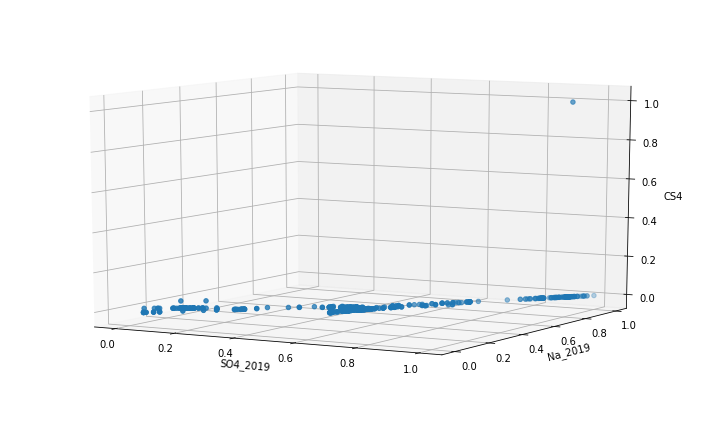

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

para_X = 'SO4_2019'
para_Y = 'Na_2019'
para_Z = 'CS4'

env_nbe_nbi_df = env_nbe_nbi_df[env_nbe_nbi_df['NO3_2019'] <=6000]
ax.scatter(xs=env_nbe_nbi_df[para_X], ys=env_nbe_nbi_df[para_Y], zs=env_nbe_nbi_df[para_Z])

ax.set_ylabel(para_Y); ax.set_xlabel(para_X); ax.set_zlabel(para_Z)
ax.view_init(10, -60)

# 2D

In [80]:
# f, axarr = plt.subplots(2, sharex=True)
# f.set_size_inches(12.5, 7.5)
# axarr[0].plot(env_nbe_nbi_df['STRUCNUM'], env_nbe_nbi_df['CS1'])
# axarr[0].set_ylabel('CS1 ')
# axarr[0].set_xlabel('CS1 ')
# axarr[1].plot(env_nbe_nbi_df['STRUCNUM'], env_nbe_nbi_df['TOTALQTY'])
# axarr[1].set_xlabel('STRUCNUM')
# axarr[1].set_ylabel('TOTALQTY')

In [18]:
env_nbe_nbi_df.columns

Index(['MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'RAILINGS_036A', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'CHANNEL_COND_061', 'OPERATING_RATING_064',
       'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068',
       'UNDCLRENCE_EVAL_069', 'POSTING_EVAL_070', 'WATERWAY_EVAL_071',
       'APPR_ROAD_EVAL_072', 'BRIDGE_IMP_COST_094', 'ROADWAY_IMP_COST_095',
       'TOTAL_IMP_COST_096', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'PIER_PROTECTION_111', 'LOWEST_RATING', 'STATE', 'STRUCNUM', 'EN',
       'TOTALQTY', 'CS1', 'CS2', 'CS3', 'CS4', 'EPN', 'temp_dp_2m',
       'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c', 'temp_s_2cm',
       'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_20

### Linear Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = env_nbe_nbi_df[['Bridge_Age','Mg_2019']]
Y = env_nbe_nbi_df[['CS1','CS2','CS3','CS4']]

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [33]:
print('Score: ', reg.score(X_test, y_test))

Score:  -2.449475154569758


In [34]:
print(reg.predict(np.array([[23,0.6]])))

[[0.48244394 1.786686   2.52240923 0.29224377]]


In [ ]:
from sklearn.decomposition import PCA